In [6]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons
import math
import os
import time
import itertools

import neural_net
import data_gen

%matplotlib notebook

#plt.rcParams['figure.figsize'] = [7, 7]

In [15]:
data = 'circles'
alpha = 0.1
f = lambda x: neural_net.relu(x)
df = lambda x: neural_net.relu(x)
structure = [2, 3]
eps = 0.001

In [16]:
if data == 'cosines':
    dataset, data1, data2 = data_gen.cosines(1000, scale=0.6, shift=0.4)
if data == 'circles':
    dataset, data1, data2 = data_gen.circles(200)

<IPython.core.display.Javascript object>


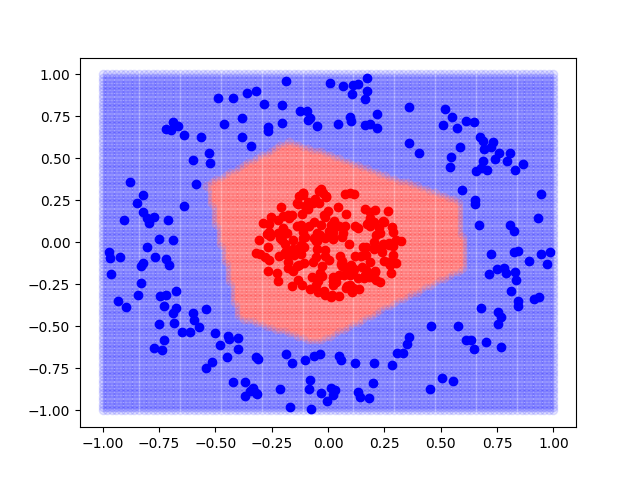

KeyboardInterrupt: 

In [17]:
fig, ax = plt.subplots()
plt.ion()
fig.show()
fig.canvas.draw()

net = neural_net.NeuralNet(f, df, nhiddens=structure, eps=eps)
#net.hiddens[0][1:, :] = np.array([[1.0, 0], [0, 1.0]])
#net.hiddens[0][0, :] = np.array([0.0, 0.0])
#net.W[1:, :] = np.asarray([1.0, 1.0])[:, None]
#net.W[0, :] = np.array([-0.4])
data_gen.plotRegions(data1, data2, net, plot=(fig, ax))
fig.canvas.draw()
time.sleep(1)

for i in range(10000):
    net.train(dataset, 100, 100)
    ax.clear()
    data_gen.plotRegions(data1, data2, net, plot=(fig, ax))
    fig.canvas.draw()
    time.sleep(1)

<IPython.core.display.Javascript object>


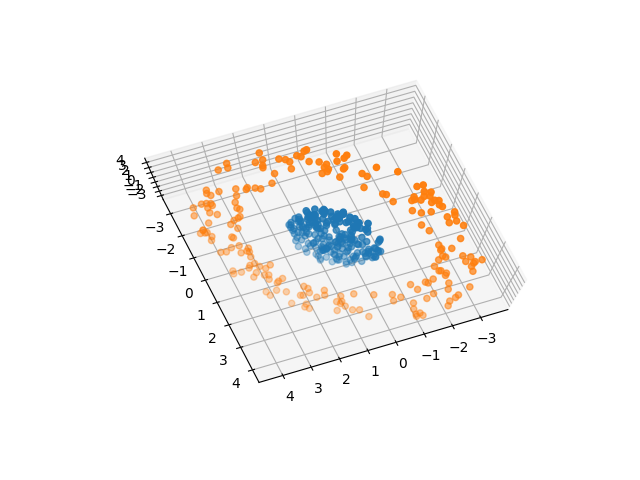

<IPython.core.display.Javascript object>


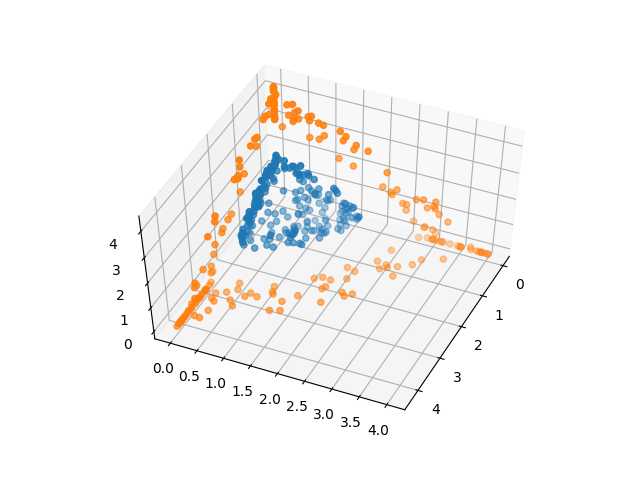

In [18]:
if structure[-1] == 3:
    Z1 = np.array(data1[:,:-1]).dot(net.hiddens[0][1:,:]) + net.hiddens[0][0,:]

    Z2 = np.array(data2[:,:-1]).dot(net.hiddens[0][1:,:]) + net.hiddens[0][0,:]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(Z1[:, 0], Z1[:, 1], Z1[:, 2], 'r');
    ax.scatter(Z2[:, 0], Z2[:, 1], Z2[:, 2], 'b');


    Z1 = f(Z1)
    Z2 = f(Z2)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(Z1[:, 0], Z1[:, 1], Z1[:, 2], 'r');
    ax.scatter(Z2[:, 0], Z2[:, 1], Z2[:, 2], 'b');

<IPython.core.display.Javascript object>


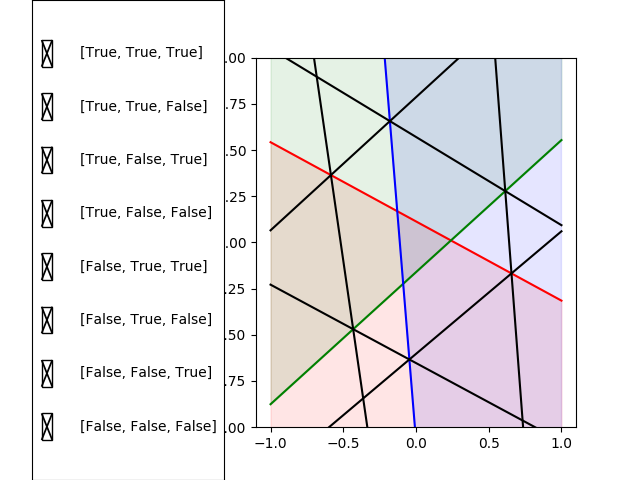

In [19]:
fig2, ax2 = plt.subplots()

lims = 1

c = iter(['r', 'g', 'b'])
x = np.linspace(-lims, lims, 2)
y2 = np.ones(len(x))
for i in range(structure[-1]):
    y = (-net.hiddens[0][0,i] - net.hiddens[0][1,i]*x)/(net.hiddens[0][2,i])
    color = next(c)
    if net.hiddens[0][2,i] > 0:
        ax2.fill_between(x, y, lims, alpha=0.1, color=color)
    else:
        ax2.fill_between(x, -lims, y, alpha=0.1, color=color)
    ax2.plot(x, y, color=color)
ax2.set_ylim(-lims, lims)

#fig3, ax3 = plt.subplots()

W = np.copy(net.W[1:])
lines = []
for i in itertools.product([True, False], repeat=structure[-1]):
    i = list(i)
    W[i] = alpha*W[i]
    y = (-net.W[0] - np.dot(W.T, net.hiddens[0][0,:]) - np.dot(W.T, net.hiddens[0][1,:])*x)/np.dot(W.T, net.hiddens[0][2,:])
    l, = ax2.plot(x, y, color='k', label=str(i))
    lines.append(l)
    W = np.copy(net.W[1:])            
    
plt.subplots_adjust(left=0.4)
rax = plt.axes([0.05, 0, 0.3, 1])
labels = [str(line.get_label()) for line in lines]
visibility = [line.get_visible() for line in lines]
check = CheckButtons(rax, labels, visibility)

def func(label):
    index = labels.index(label)
    lines[index].set_visible(not lines[index].get_visible())
    plt.draw()
    
check.on_clicked(func)

plt.show()

In [20]:
def apply(data):
    hiddens = [np.array([[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]) for i in range(4)]
    hiddens[0][1:, :] = np.array([[1.0, 0], [0, 1]])
#     hiddens[1][1:, :] = np.array([[-1.0, 0], [0, 1]])
#     hiddens[2][1:, :] = np.array([[0.1, 0], [0, 1]])
#     hiddens[3][1:, :] = np.array([[1.0, 0], [0, -1]])

    hiddens[0][0, :] = np.array([0, 0])
#     hiddens[1][0, :] = np.array([0.8, 0])
#     hiddens[2][0, :] = np.array([0, -0.6])
#     hiddens[3][0, :] = np.array([0, 0.8])

    Z1 = neural_net.leakyrelu(np.array(data[:,:-1]).dot(hiddens[0][1:,:]) + hiddens[0][0,:], -1.0)
    #Z2 = neural_net.leakyrelu(Z1.dot(hiddens[1][1:,:]) + hiddens[1][0,:], -1.0)
    #Z3 = neural_net.leakyrelu(Z2.dot(hiddens[2][1:,:]) + hiddens[2][0,:], -1.0)
    #Z4 = neural_net.leakyrelu(Z3.dot(hiddens[3][1:,:]) + hiddens[3][0,:], -1.0)
    
    Z2 = np.array(data[:,:-1]).dot(hiddens[0][1:,:]) + hiddens[0][0,:]
    
    return Z1#, Z2, Z3, Z4


<IPython.core.display.Javascript object>


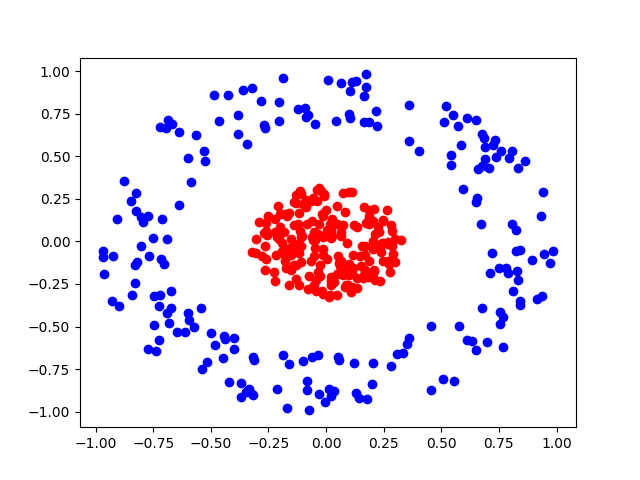

<IPython.core.display.Javascript object>


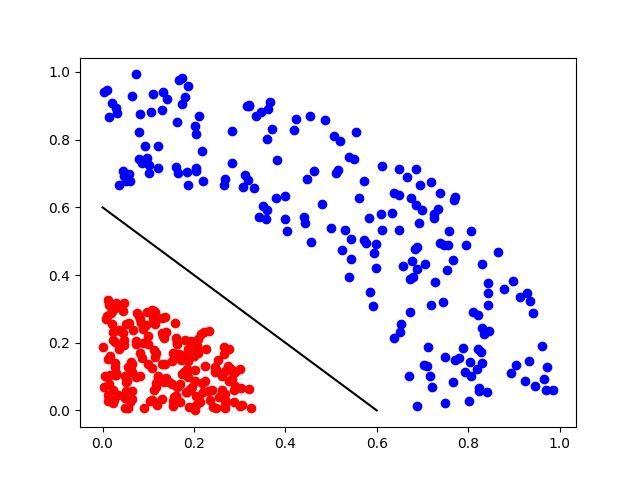

In [21]:
d1 = apply(data1)
d2 = apply(data2)

fig, ax = plt.subplots()
ax.plot(data1[:, 0], data1[:, 1], 'or');
ax.plot(data2[:, 0], data2[:, 1], 'ob');


fig, ax = plt.subplots()
ax.plot(d1[:, 0], d1[:, 1], 'ro');
ax.plot(d2[:, 0], d2[:, 1], 'bo');
ax.plot([0, 0.6], [0.6, 0], 'k')

In [ ]:
# d1 = apply(data1)
# d2 = apply(data2)

# fig, ax = plt.subplots()
# ax.plot(data1[:, 0], data1[:, 1], 'or');
# ax.plot(data2[:, 0], data2[:, 1], 'ob');

# for i in range(len(d1)):
#     fig, ax = plt.subplots()
#     ax.plot(d1[i][:, 0], d1[i][:, 1], 'ro');
#     ax.plot(d2[i][:, 0], d2[i][:, 1], 'bo');

In [ ]:
# fig2, ax2 = plt.subplots()
# fig, ax = plt.subplots()
# ax.set_facecolor('black')

# maxVal = -float('inf')
# minVal = float('inf')
# for x in np.linspace(-1, 1, 50):
#     for y in np.linspace(-1, 1, 50):
#         res = neural_net.relu(np.array([x, y]).dot(net.hiddens[0][1:,:]) + net.hiddens[0][0,:])

#         Y = res.dot(net.W[1:, :]) + net.W[0,:]
#         maxVal = max(Y, maxVal)
#         minVal = min(Y, minVal)
# #vals = []
# for x in np.linspace(-1, 1, 50):
#     for y in np.linspace(-1, 1, 50):
#         res = neural_net.relu(np.array([x, y]).dot(net.hiddens[0][1:,:]) + net.hiddens[0][0,:])

#         Y = res.dot(net.W[1:, :]) + net.W[0,:]
#         color = (Y - minVal)/(maxVal - minVal)
#         #ax.plot(x, y, '.', color=(color, color, color))
#         if Y > 0:
#             ax.plot(x, y, 'o', alpha=0.1, color='white')
#             ax2.plot(x, y, '.', alpha=0.3, color='gray')
#         res = res > 0
#         if res[0]:
#             ax.plot(x, y, 'r.', alpha=color)
#         if res[1]:
#             ax.plot(x, y, 'g.', alpha=color)
#         if res[2]:
#             ax.plot(x, y, 'b.', alpha=color)
#         if not np.any(res):
#             ax.plot(x, y, '.', color='white', alpha=color)

# c = ['r', 'g', 'b']
# x = np.linspace(-1, 1, 2)
# y2 = np.ones(len(x))
# for i in range(3):
#     y = (-net.hiddens[0][0,i] - net.hiddens[0][1,i]*x)/(net.hiddens[0][2,i])
#     if net.hiddens[0][2,i] > 0:
#         ax2.fill_between(x, y, 1, alpha=0.1, color=c[i])
#     else:
#         ax2.fill_between(x, -1, y, alpha=0.1, color=c[i])
#     ax2.plot(x, y, color=c[i])
# ax2.set_ylim(-1, 1)

# #fig3, ax3 = plt.subplots()

# W = np.copy(net.W[1:])
# print(net.W[1:])
# y = (-net.W[0] - np.dot(W.T, net.hiddens[0][0,:]) - np.dot(W.T, net.hiddens[0][1,:])*x)/np.dot(W.T, net.hiddens[0][2,:])
# ax2.plot(x, y, 'k')
# for i in range(W.shape[0]):
#     W[i] = 0
#     y = (-net.W[0] - np.dot(W.T, net.hiddens[0][0,:]) - np.dot(W.T, net.hiddens[0][1,:])*x)/np.dot(W.T, net.hiddens[0][2,:])
#     ax2.plot(x, y, 'k')
#     W = np.copy(net.W[1:])
    
# W = np.copy(net.W[1:])
# for i in [[0, 1], [1, 2], [0, 2]]:
#     W[i] = 0
#     y = (-net.W[0] - np.dot(W.T, net.hiddens[0][0,:]) - np.dot(W.T, net.hiddens[0][1,:])*x)/np.dot(W.T, net.hiddens[0][2,:])
#     ax2.plot(x, y, color='gray')
#     W = np.copy(net.W[1:])

# y = (-net.W[0] - np.dot(net.W[1:].T, net.hiddens[0][0,:]) - np.dot(net.W[1:].T, net.hiddens[0][1,:])*x)/np.dot(net.W[1:].T, net.hiddens[0][2,:])

# ax2.plot(x, y, 'k')
        
            
